# Machine Learning Analysis

<div class="alert alert-block alert-info">
We will develop some Machine Learning techniques with our data in order to try to classify the samples in FastSurfer/FreeSurfer.
If FastSurfer actually get results similar to FreeSurfer, we will expect some metrics such as 'accuracy' to be very low. Otherwise, we will get good metrics.
At first, we will include all the regions in the data. We expect the accuracy to be high because there are some regions in FastSurfer whose values are not distributed like in FreeSurfer.
Afterwards, we will remove those regions that are not similar in both Softwares, so we will expect low accuracies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

In [2]:
concat_df = pd.read_pickle('all_stats_f7.pkl')
statsFastSurfer = pd.read_pickle('statsFastSurfer_f7.pkl')
statsFreeSurfer = pd.read_pickle('statsFreeSurfer_f7.pkl')

In [3]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                              
10010   FastSurfer         1252.3         1545.0            0.0     23478.7   
        FreeSurfer         1160.4         1395.3            0.0     23388.7   
10011   FastSurfer         1395.7         1464.9            0.0     20967.4   
        FreeSurfer         1243.8         1341.1            0.0     20558.4   
10012   FastSurfer         1373.6         1385.9            0.0     21221.4   

                     BrainSegVol  BrainSegVolNotVent  CC_Anterior  CC_Central  \
subject Software                                                                
10010   FastSurfer  1.130872e+06        1.103652e+06       1159.2       914.5   
        FreeSurfer  1.140177e+06        1.113767e+06        723.8       360.5   
10011   FastSurfer  1.013429e+06        9.930320e+05        703.7       339.2   
        FreeSurfer  1.006308e+06        9.865598e+05        520.4       256.3   
10012   FastSurfer  1.074364e+06        1.042517e+06        981.2       712.4   

                    CC_Mid_Anterior  CC_Mid_Posterior  ...  SubCortGrayVol  \
subject Software                                       ...                   
10010   FastSurfer            541.8             550.7  ...    58464.000000   
        FreeSurfer            402.9             395.7  ...    58854.093750   
10011   FastSurfer            350.5             329.4  ...    50086.000000   
        FreeSurfer            260.9             253.9  ...    51836.203125   
10012   FastSurfer            388.5             462.9  ...    51157.000000   

                    SupraTentorialVol  SupraTentorialVolNotVent  \
subject Software                                                  
10010   FastSurfer      985329.127032             962081.127032   
        FreeSurfer      990306.421875             963896.625000   
10011   FastSurfer      895651.319629             879223.319629   
        FreeSurfer      881055.562500             861307.171875   
10012   FastSurfer      958722.844341             930585.844341   

                     TotalGrayVol  WM-hypointensities  \
subject Software                                        
10010   FastSurfer  606493.534351              2402.2   
        FreeSurfer  620161.819810              1997.8   
10011   FastSurfer  579274.765061              1071.5   
        FreeSurfer  579510.277307              1167.6   
10012   FastSurfer  584596.562471              1390.8   

                    lhCerebralWhiteMatterVol    lhCortexVol  \
subject Software                                              
10010   FastSurfer             235160.339637  220400.716587   
        FreeSurfer             233609.484375  223312.769133   
10011   FastSurfer             195681.058639  218365.416744   
        FreeSurfer             189834.468750  213108.455452   
10012   FastSurfer             215145.144558  219214.854598   

                    non-WM-hypointensities  rhCerebralWhiteMatterVol  \
subject Software                                                       
10010   FastSurfer                     0.0             231447.253043   
        FreeSurfer                    12.3             228810.234375   
10011   FastSurfer                     0.0             196481.495929   
        FreeSurfer                     4.0             191989.828125   
10012   FastSurfer                     0.0             218237.137312   

                      rhCortexVol  
subject Software                   
10010   FastSurfer  215464.817764  
        FreeSurfer  220056.003802  
10011   FastSurfer  217480.348316  
        FreeSurfer  214773.196854  
10012   FastSurfer  225925.707873  

[5 rows x 55 columns]

## Preprocessing

In [4]:
concat_df.reset_index(inplace=True)

In [5]:
concat_df.columns

Index(['subject', 'Software', '3rd-Ventricle', '4th-Ventricle',
       '5th-Ventricle', 'Brain-Stem', 'BrainSegVol', 'BrainSegVolNotVent',
       'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior',
       'CC_Posterior', 'CSF', 'CerebralWhiteMatterVol', 'Left-Accumbens-area',
       'Left-Amygdala', 'Left-Caudate', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Left-Hippocampus', 'Left-Inf-Lat-Vent',
       'Left-Lateral-Ventricle', 'Left-Pallidum', 'Left-Putamen',
       'Left-VentralDC', 'Left-WM-hypointensities', 'Left-choroid-plexus',
       'Left-non-WM-hypointensities', 'Left-vessel', 'MaskVol', 'Optic-Chiasm',
       'Right-Accumbens-area', 'Right-Amygdala', 'Right-Caudate',
       'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter',
       'Right-Hippocampus', 'Right-Inf-Lat-Vent', 'Right-Lateral-Ventricle',
       'Right-Pallidum', 'Right-Putamen', 'Right-VentralDC',
       'Right-WM-hypointensities', 'Right-choroid-plexus',
       'Ri

<div class="alert alert-block alert-info">
    
We will replace the output (FastSurfer and FreeSurfer) for 0 and 1

In [6]:
concat_df['Software'].replace(to_replace='FastSurfer', value=0, inplace=True)
concat_df['Software'].replace(to_replace='FreeSurfer', value=1, inplace=True)

In [7]:
concat_df.head()

,subject,Software,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSegVol,BrainSegVolNotVent,CC_Anterior,CC_Central,...,SubCortGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,TotalGrayVol,WM-hypointensities,lhCerebralWhiteMatterVol,lhCortexVol,non-WM-hypointensities,rhCerebralWhiteMatterVol,rhCortexVol
0,10010,0,1252.3,1545.0,0.0,23478.7,1.130872e+06,1.103652e+06,1159.2,914.5,...,58464.000000,985329.127032,962081.127032,606493.534351,2402.2,235160.339637,220400.716587,0.0,231447.253043,215464.817764
1,10010,1,1160.4,1395.3,0.0,23388.7,1.140177e+06,1.113767e+06,723.8,360.5,...,58854.093750,990306.421875,963896.625000,620161.819810,1997.8,233609.484375,223312.769133,12.3,228810.234375,220056.003802
2,10011,0,1395.7,1464.9,0.0,20967.4,1.013429e+06,9.930320e+05,703.7,339.2,...,50086.000000,895651.319629,879223.319629,579274.765061,1071.5,195681.058639,218365.416744,0.0,196481.495929,217480.348316
3,10011,1,1243.8,1341.1,0.0,20558.4,1.006308e+06,9.865598e+05,520.4,256.3,...,51836.203125,881055.562500,861307.171875,579510.277307,1167.6,189834.468750,213108.455452,4.0,191989.828125,214773.196854
4,10012,0,1373.6,1385.9,0.0,21221.4,1.074364e+06,1.042517e+06,981.2,712.4,...,51157.000000,958722.844341,930585.844341,584596.562471,1390.8,215145.144558,219214.854598,0.0,218237.137312,225925.707873


In [8]:
concat_df.drop('subject',axis=1, inplace=True)

In [9]:
concat_df.head()

,Software,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSegVol,BrainSegVolNotVent,CC_Anterior,CC_Central,CC_Mid_Anterior,...,SubCortGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,TotalGrayVol,WM-hypointensities,lhCerebralWhiteMatterVol,lhCortexVol,non-WM-hypointensities,rhCerebralWhiteMatterVol,rhCortexVol
0,0,1252.3,1545.0,0.0,23478.7,1.130872e+06,1.103652e+06,1159.2,914.5,541.8,...,58464.000000,985329.127032,962081.127032,606493.534351,2402.2,235160.339637,220400.716587,0.0,231447.253043,215464.817764
1,1,1160.4,1395.3,0.0,23388.7,1.140177e+06,1.113767e+06,723.8,360.5,402.9,...,58854.093750,990306.421875,963896.625000,620161.819810,1997.8,233609.484375,223312.769133,12.3,228810.234375,220056.003802
2,0,1395.7,1464.9,0.0,20967.4,1.013429e+06,9.930320e+05,703.7,339.2,350.5,...,50086.000000,895651.319629,879223.319629,579274.765061,1071.5,195681.058639,218365.416744,0.0,196481.495929,217480.348316
3,1,1243.8,1341.1,0.0,20558.4,1.006308e+06,9.865598e+05,520.4,256.3,260.9,...,51836.203125,881055.562500,861307.171875,579510.277307,1167.6,189834.468750,213108.455452,4.0,191989.828125,214773.196854
4,0,1373.6,1385.9,0.0,21221.4,1.074364e+06,1.042517e+06,981.2,712.4,388.5,...,51157.000000,958722.844341,930585.844341,584596.562471,1390.8,215145.144558,219214.854598,0.0,218237.137312,225925.707873


In [10]:
concat_df.describe()

,Software,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSegVol,BrainSegVolNotVent,CC_Anterior,CC_Central,CC_Mid_Anterior,...,SubCortGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,TotalGrayVol,WM-hypointensities,lhCerebralWhiteMatterVol,lhCortexVol,non-WM-hypointensities,rhCerebralWhiteMatterVol,rhCortexVol
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2.876000e+03,2.876000e+03,2876.000000,2876.000000,2876.000000,...,2876.000000,2.876000e+03,2.876000e+03,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000
mean,0.500000,1300.899896,1816.918150,0.003303,20839.992768,1.073753e+06,1.045966e+06,782.700974,482.122949,430.739013,...,52706.412250,9.470941e+05,9.214793e+05,594502.324686,2421.730737,213498.109085,220774.725858,0.359040,213381.190487,220968.655307
std,0.500087,475.395832,483.860538,0.071063,2219.006237,1.026498e+05,9.924223e+04,194.588150,184.322411,140.108892,...,4876.396146,9.453178e+04,9.120100e+04,50886.168239,2179.368232,25552.665639,20222.566384,1.923616,25493.424121,20280.421231
min,0.000000,460.800000,663.400000,0.000000,14782.600000,7.908040e+05,7.660560e+05,342.700000,183.100000,173.700000,...,38359.000000,6.828178e+05,6.602833e+05,447401.519428,632.300000,144264.434023,163260.322720,0.000000,143647.918584,160374.527736
25%,0.000000,956.025000,1474.575000,0.000000,19320.800000,9.991039e+05,9.748085e+05,636.925000,332.550000,332.900000,...,49274.000000,8.783679e+05,8.562421e+05,558970.687087,1400.675000,194202.468301,206659.777991,0.000000,194472.821314,207165.312166
50%,0.500000,1203.900000,1735.950000,0.000000,20679.450000,1.067490e+06,1.040414e+06,752.950000,417.050000,397.500000,...,52498.233012,9.418480e+05,9.158562e+05,591798.768742,1838.000000,211886.159733,219593.002505,0.000000,212041.465703,219618.778486
75%,1.000000,1536.375000,2089.575000,0.000000,22346.550000,1.142129e+06,1.113796e+06,902.625000,622.125000,486.450000,...,55968.750000,1.008938e+06,9.823188e+05,626474.305157,2591.250000,231280.498591,233489.898527,0.000000,230862.951062,233809.611978
max,1.000000,4341.000000,6076.800000,2.600000,28267.700000,1.387998e+06,1.345575e+06,1524.800000,1149.200000,1115.600000,...,68872.000000,1.250859e+06,1.190503e+06,778846.692866,30672.100000,303838.387755,297953.687467,35.800000,304417.018195,302706.476319


## Correlation map in FastSurfer stats

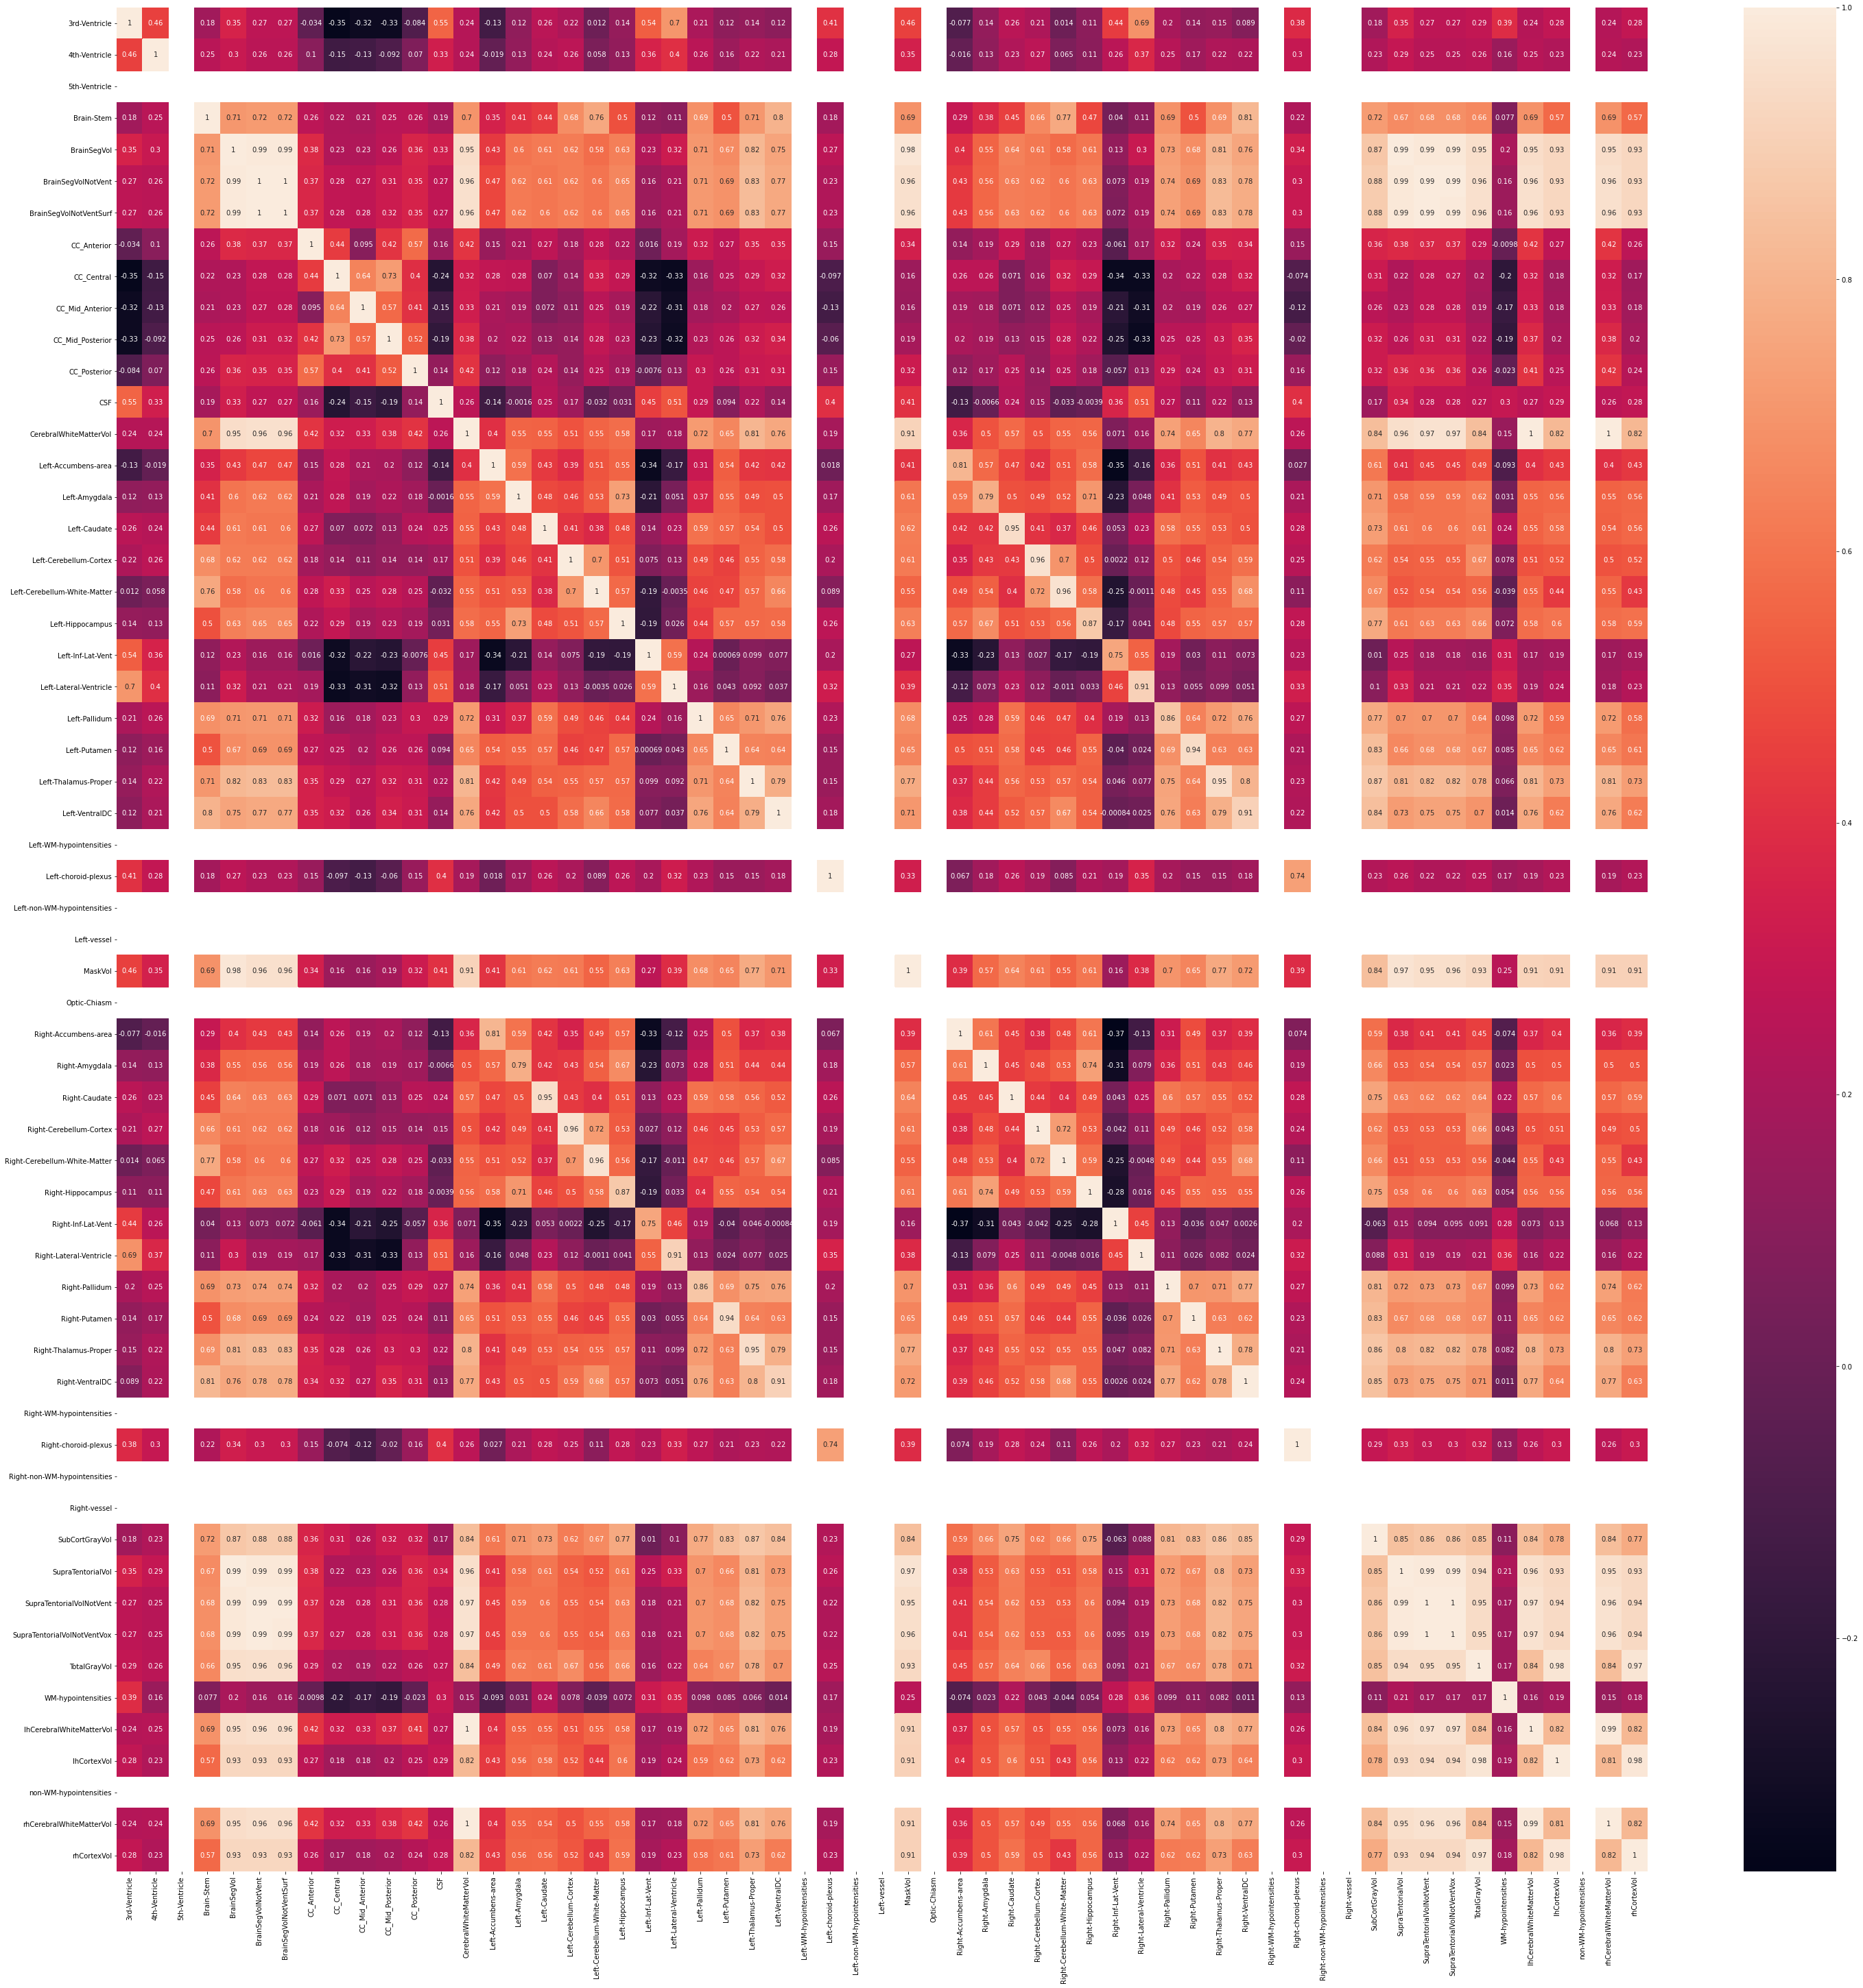

In [11]:
#Correlation map
f, ax = plt.subplots(figsize=(50, 50))
corr = statsFastSurfer.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Catboost Classifier with all the regions included

In [11]:
y = concat_df.Software
x = concat_df.drop(columns=['Software'])

#### Split in train and test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Split in train and validation

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

Learning rate set to 0.067611
0:	learn: 0.5070111	test: 0.5081109	best: 0.5081109 (0)	total: 15.7ms	remaining: 15.7s
1:	learn: 0.3633536	test: 0.3631308	best: 0.3631308 (1)	total: 31.3ms	remaining: 15.6s
2:	learn: 0.2585230	test: 0.2589625	best: 0.2589625 (2)	total: 46.9ms	remaining: 15.6s
3:	learn: 0.1847665	test: 0.1848312	best: 0.1848312 (3)	total: 58.5ms	remaining: 14.6s
4:	learn: 0.1338096	test: 0.1340931	best: 0.1340931 (4)	total: 74ms	remaining: 14.7s
5:	learn: 0.0984469	test: 0.0987561	best: 0.0987561 (5)	total: 89.5ms	remaining: 14.8s
6:	learn: 0.0731145	test: 0.0734497	best: 0.0734497 (6)	total: 99.1ms	remaining: 14.1s
7:	learn: 0.0553190	test: 0.0558898	best: 0.0558898 (7)	total: 114ms	remaining: 14.2s
8:	learn: 0.0421451	test: 0.0425055	best: 0.0425055 (8)	total: 123ms	remaining: 13.6s
9:	learn: 0.0319369	test: 0.0320971	best: 0.0320971 (9)	total: 133ms	remaining: 13.2s
10:	learn: 0.0243033	test: 0.0244533	best: 0.0244533 (10)	total: 144ms	remaining: 12.9s
11:	learn: 0.0198

100:	learn: 0.0002839	test: 0.0002944	best: 0.0002944 (100)	total: 1.2s	remaining: 10.7s
101:	learn: 0.0002739	test: 0.0002867	best: 0.0002867 (101)	total: 1.21s	remaining: 10.6s
102:	learn: 0.0002737	test: 0.0002867	best: 0.0002867 (102)	total: 1.22s	remaining: 10.6s
103:	learn: 0.0002736	test: 0.0002866	best: 0.0002866 (103)	total: 1.23s	remaining: 10.6s
104:	learn: 0.0002735	test: 0.0002866	best: 0.0002866 (104)	total: 1.24s	remaining: 10.6s
105:	learn: 0.0002733	test: 0.0002866	best: 0.0002866 (104)	total: 1.25s	remaining: 10.5s
106:	learn: 0.0002731	test: 0.0002866	best: 0.0002866 (104)	total: 1.26s	remaining: 10.5s
107:	learn: 0.0002730	test: 0.0002866	best: 0.0002866 (107)	total: 1.26s	remaining: 10.4s
108:	learn: 0.0002729	test: 0.0002866	best: 0.0002866 (108)	total: 1.27s	remaining: 10.4s
109:	learn: 0.0002703	test: 0.0002844	best: 0.0002844 (109)	total: 1.29s	remaining: 10.4s
110:	learn: 0.0002653	test: 0.0002787	best: 0.0002787 (110)	total: 1.3s	remaining: 10.4s
111:	learn: 

199:	learn: 0.0001842	test: 0.0002070	best: 0.0002070 (199)	total: 2.23s	remaining: 8.93s
200:	learn: 0.0001842	test: 0.0002070	best: 0.0002070 (199)	total: 2.24s	remaining: 8.9s
201:	learn: 0.0001841	test: 0.0002070	best: 0.0002070 (201)	total: 2.25s	remaining: 8.88s
202:	learn: 0.0001841	test: 0.0002070	best: 0.0002070 (202)	total: 2.26s	remaining: 8.86s
203:	learn: 0.0001827	test: 0.0002057	best: 0.0002057 (203)	total: 2.27s	remaining: 8.86s
204:	learn: 0.0001826	test: 0.0002057	best: 0.0002057 (203)	total: 2.28s	remaining: 8.84s
205:	learn: 0.0001826	test: 0.0002057	best: 0.0002057 (205)	total: 2.29s	remaining: 8.81s
206:	learn: 0.0001826	test: 0.0002057	best: 0.0002057 (206)	total: 2.29s	remaining: 8.79s
207:	learn: 0.0001802	test: 0.0002030	best: 0.0002030 (207)	total: 2.3s	remaining: 8.77s
208:	learn: 0.0001801	test: 0.0002030	best: 0.0002030 (208)	total: 2.31s	remaining: 8.75s
209:	learn: 0.0001801	test: 0.0002030	best: 0.0002030 (209)	total: 2.32s	remaining: 8.73s
210:	learn: 

309:	learn: 0.0001534	test: 0.0001772	best: 0.0001772 (300)	total: 3.25s	remaining: 7.23s
310:	learn: 0.0001533	test: 0.0001772	best: 0.0001772 (310)	total: 3.26s	remaining: 7.23s
311:	learn: 0.0001533	test: 0.0001772	best: 0.0001772 (311)	total: 3.27s	remaining: 7.21s
312:	learn: 0.0001533	test: 0.0001772	best: 0.0001772 (312)	total: 3.28s	remaining: 7.2s
313:	learn: 0.0001521	test: 0.0001759	best: 0.0001759 (313)	total: 3.29s	remaining: 7.2s
314:	learn: 0.0001503	test: 0.0001740	best: 0.0001740 (314)	total: 3.3s	remaining: 7.18s
315:	learn: 0.0001503	test: 0.0001741	best: 0.0001740 (314)	total: 3.32s	remaining: 7.18s
316:	learn: 0.0001503	test: 0.0001741	best: 0.0001740 (314)	total: 3.33s	remaining: 7.17s
317:	learn: 0.0001503	test: 0.0001741	best: 0.0001740 (314)	total: 3.33s	remaining: 7.15s
318:	learn: 0.0001497	test: 0.0001734	best: 0.0001734 (318)	total: 3.35s	remaining: 7.15s
319:	learn: 0.0001487	test: 0.0001725	best: 0.0001725 (319)	total: 3.36s	remaining: 7.15s
320:	learn: 0

413:	learn: 0.0001287	test: 0.0001510	best: 0.0001510 (413)	total: 4.27s	remaining: 6.04s
414:	learn: 0.0001287	test: 0.0001510	best: 0.0001510 (413)	total: 4.28s	remaining: 6.03s
415:	learn: 0.0001287	test: 0.0001510	best: 0.0001510 (415)	total: 4.28s	remaining: 6.01s
416:	learn: 0.0001287	test: 0.0001510	best: 0.0001510 (415)	total: 4.29s	remaining: 6s
417:	learn: 0.0001287	test: 0.0001510	best: 0.0001510 (417)	total: 4.3s	remaining: 5.99s
418:	learn: 0.0001283	test: 0.0001507	best: 0.0001507 (418)	total: 4.32s	remaining: 5.98s
419:	learn: 0.0001283	test: 0.0001507	best: 0.0001507 (418)	total: 4.32s	remaining: 5.97s
420:	learn: 0.0001277	test: 0.0001501	best: 0.0001501 (420)	total: 4.34s	remaining: 5.97s
421:	learn: 0.0001277	test: 0.0001501	best: 0.0001501 (421)	total: 4.34s	remaining: 5.95s
422:	learn: 0.0001273	test: 0.0001498	best: 0.0001498 (422)	total: 4.36s	remaining: 5.95s
423:	learn: 0.0001273	test: 0.0001497	best: 0.0001497 (423)	total: 4.37s	remaining: 5.94s
424:	learn: 0.

510:	learn: 0.0001121	test: 0.0001337	best: 0.0001337 (510)	total: 5.28s	remaining: 5.05s
511:	learn: 0.0001121	test: 0.0001337	best: 0.0001337 (510)	total: 5.29s	remaining: 5.04s
512:	learn: 0.0001111	test: 0.0001331	best: 0.0001331 (512)	total: 5.3s	remaining: 5.03s
513:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (513)	total: 5.31s	remaining: 5.02s
514:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (513)	total: 5.32s	remaining: 5.01s
515:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (515)	total: 5.33s	remaining: 5s
516:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (515)	total: 5.34s	remaining: 4.99s
517:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (515)	total: 5.35s	remaining: 4.98s
518:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (518)	total: 5.36s	remaining: 4.97s
519:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (519)	total: 5.37s	remaining: 4.96s
520:	learn: 0.0001095	test: 0.0001315	best: 0.0001315 (519)	total: 5.38s	remaining: 4.94s
521:	learn: 0.

612:	learn: 0.0000944	test: 0.0001155	best: 0.0001155 (612)	total: 6.3s	remaining: 3.98s
613:	learn: 0.0000944	test: 0.0001155	best: 0.0001155 (612)	total: 6.31s	remaining: 3.97s
614:	learn: 0.0000944	test: 0.0001155	best: 0.0001155 (612)	total: 6.32s	remaining: 3.96s
615:	learn: 0.0000944	test: 0.0001155	best: 0.0001155 (612)	total: 6.33s	remaining: 3.95s
616:	learn: 0.0000944	test: 0.0001155	best: 0.0001155 (612)	total: 6.34s	remaining: 3.94s
617:	learn: 0.0000937	test: 0.0001147	best: 0.0001147 (617)	total: 6.36s	remaining: 3.93s
618:	learn: 0.0000937	test: 0.0001147	best: 0.0001147 (617)	total: 6.36s	remaining: 3.92s
619:	learn: 0.0000937	test: 0.0001147	best: 0.0001147 (617)	total: 6.37s	remaining: 3.9s
620:	learn: 0.0000937	test: 0.0001147	best: 0.0001147 (617)	total: 6.38s	remaining: 3.89s
621:	learn: 0.0000937	test: 0.0001147	best: 0.0001147 (617)	total: 6.39s	remaining: 3.88s
622:	learn: 0.0000931	test: 0.0001140	best: 0.0001140 (622)	total: 6.4s	remaining: 3.87s
623:	learn: 0

704:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (702)	total: 7.33s	remaining: 3.07s
705:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (702)	total: 7.34s	remaining: 3.06s
706:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (706)	total: 7.35s	remaining: 3.04s
707:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (707)	total: 7.36s	remaining: 3.03s
708:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (707)	total: 7.37s	remaining: 3.02s
709:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (707)	total: 7.38s	remaining: 3.01s
710:	learn: 0.0000796	test: 0.0000983	best: 0.0000983 (710)	total: 7.39s	remaining: 3s
711:	learn: 0.0000793	test: 0.0000980	best: 0.0000980 (711)	total: 7.4s	remaining: 2.99s
712:	learn: 0.0000791	test: 0.0000978	best: 0.0000978 (712)	total: 7.42s	remaining: 2.98s
713:	learn: 0.0000791	test: 0.0000978	best: 0.0000978 (713)	total: 7.42s	remaining: 2.97s
714:	learn: 0.0000791	test: 0.0000978	best: 0.0000978 (713)	total: 7.43s	remaining: 2.96s
715:	learn: 0.

806:	learn: 0.0000697	test: 0.0000883	best: 0.0000883 (806)	total: 8.55s	remaining: 2.04s
807:	learn: 0.0000688	test: 0.0000875	best: 0.0000875 (807)	total: 8.56s	remaining: 2.03s
808:	learn: 0.0000688	test: 0.0000875	best: 0.0000875 (808)	total: 8.57s	remaining: 2.02s
809:	learn: 0.0000686	test: 0.0000871	best: 0.0000871 (809)	total: 8.59s	remaining: 2.01s
810:	learn: 0.0000686	test: 0.0000871	best: 0.0000871 (809)	total: 8.59s	remaining: 2s
811:	learn: 0.0000686	test: 0.0000872	best: 0.0000871 (809)	total: 8.61s	remaining: 1.99s
812:	learn: 0.0000683	test: 0.0000869	best: 0.0000869 (812)	total: 8.62s	remaining: 1.98s
813:	learn: 0.0000681	test: 0.0000868	best: 0.0000868 (813)	total: 8.64s	remaining: 1.97s
814:	learn: 0.0000681	test: 0.0000867	best: 0.0000867 (814)	total: 8.65s	remaining: 1.96s
815:	learn: 0.0000681	test: 0.0000868	best: 0.0000867 (814)	total: 8.66s	remaining: 1.95s
816:	learn: 0.0000678	test: 0.0000864	best: 0.0000864 (816)	total: 8.67s	remaining: 1.94s
817:	learn: 0

913:	learn: 0.0000610	test: 0.0000787	best: 0.0000787 (913)	total: 9.78s	remaining: 920ms
914:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (914)	total: 9.79s	remaining: 910ms
915:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (914)	total: 9.81s	remaining: 899ms
916:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.81s	remaining: 888ms
917:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.82s	remaining: 878ms
918:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.83s	remaining: 867ms
919:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.85s	remaining: 856ms
920:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.86s	remaining: 845ms
921:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.86s	remaining: 835ms
922:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.87s	remaining: 824ms
923:	learn: 0.0000609	test: 0.0000786	best: 0.0000786 (916)	total: 9.88s	remaining: 813ms
924:	learn

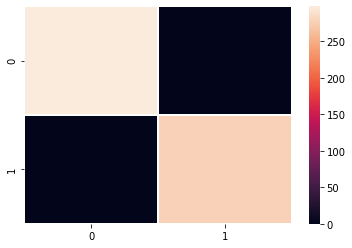

catboost Acc :  1.0


In [15]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=1000,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Acurracy is 100%, so, when we include all the regions in the data, our model is able to classify each subject in the correct Software

## Catboost Classifier with some regions included

We have removed those regions that, visually, differ so much from the other Software and also those that haven't been segmentated by the Softwares

In [17]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','CerebralWhiteMatterVol','Left-Inf-Lat-Vent',
                            'MaskVol','Right-Inf-Lat-Vent','SupraTentorialVol',
                            'SupraTentorialVolNotVent',
                            'lhCerebralWhiteMatterVol','TotalGrayVol',
                            'lhCortexVol','rhCerebralWhiteMatterVol','rhCortexVol',
                            '5th-Ventricle','Left-WM-hypointensities', 
                           'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

#### Split in train and test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

#### Split in train and validation

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [20]:
print(x_train.shape)
print(x_test.shape)

(1840, 30)
(576, 30)


Learning rate set to 0.175394
0:	learn: 0.5746810	test: 0.5775420	best: 0.5775420 (0)	total: 3.54ms	remaining: 351ms
1:	learn: 0.4893017	test: 0.4988529	best: 0.4988529 (1)	total: 6.3ms	remaining: 309ms
2:	learn: 0.4331726	test: 0.4530488	best: 0.4530488 (2)	total: 9.07ms	remaining: 293ms
3:	learn: 0.3952257	test: 0.4208727	best: 0.4208727 (3)	total: 11.9ms	remaining: 284ms
4:	learn: 0.3675785	test: 0.3972961	best: 0.3972961 (4)	total: 14.6ms	remaining: 278ms
5:	learn: 0.3443136	test: 0.3779721	best: 0.3779721 (5)	total: 17.4ms	remaining: 273ms
6:	learn: 0.3234358	test: 0.3626779	best: 0.3626779 (6)	total: 20.2ms	remaining: 268ms
7:	learn: 0.3077877	test: 0.3444896	best: 0.3444896 (7)	total: 23ms	remaining: 264ms
8:	learn: 0.2961877	test: 0.3360670	best: 0.3360670 (8)	total: 25.8ms	remaining: 260ms
9:	learn: 0.2859383	test: 0.3253616	best: 0.3253616 (9)	total: 28.6ms	remaining: 257ms
10:	learn: 0.2755438	test: 0.3167871	best: 0.3167871 (10)	total: 31.2ms	remaining: 252ms
11:	learn: 0.2

{'learn': {'Logloss': 0.06476926803588867}, 'validation': {'Logloss': 0.2383452208145805}}
[[277.  21.]
 [ 34. 244.]]


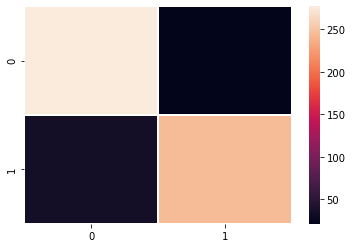

catboost Acc :  0.9045138888888888


In [21]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=100,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Accuracy has gone down to 91%. It's still a high accuracy but now we can demonstrate that our model can't always know where the data came from

## Random Forest

In [22]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','CerebralWhiteMatterVol','Left-Inf-Lat-Vent',
                            'MaskVol','Right-Inf-Lat-Vent','SupraTentorialVol',
                            'SupraTentorialVolNotVent',
                            'lhCerebralWhiteMatterVol','TotalGrayVol',
                            'lhCortexVol','rhCerebralWhiteMatterVol','rhCortexVol',
                            '5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

<div class="alert alert-block alert-info">
First, we will make hyperparameter tuning in order to find the best hyperparameters for the model

In [25]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [26]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


<div class="alert alert-block alert-info">
Once we've found the best parameter, we introduce them into the model

In [30]:
forestOpt = RandomForestClassifier(random_state = 3, max_depth = 25,
                                   n_estimators = 500, min_samples_split = 5, 
                                   min_samples_leaf = 1)

In [31]:
modelOpt = forestOpt.fit(x_train, y_train)
y_pred = modelOpt.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9027777777777778

<div class="alert alert-block alert-info">
Random Forest Classifier with hyperparameter tuning offers 88% accuracy, a result similar to the one obtained with CatBoost Classifier